Files already downloaded and verified
Files already downloaded and verified
Точность без обучения: 9.95%
Точность без обучения: 10.02%
Эпоха: 1, Потери: 0.03566787316083908
Эпоха: 2, Потери: 0.0291701496052742
Эпоха: 3, Потери: 0.024108278563022615
Эпоха: 4, Потери: 0.020512384352684022
Эпоха: 5, Потери: 0.01750542287707329
Эпоха: 6, Потери: 0.014975771317481994
Эпоха: 7, Потери: 0.012809686189889908
Эпоха: 8, Потери: 0.011019791955947876
Эпоха: 9, Потери: 0.009485681862831115
Эпоха: 10, Потери: 0.008134810025691986
Эпоха: 11, Потери: 0.0068170351621508595
Эпоха: 12, Потери: 0.005662829695045948
Эпоха: 13, Потери: 0.004580805929675699
Эпоха: 14, Потери: 0.0036164531693607567
Эпоха: 15, Потери: 0.00276920998763293
Обучение завершено
Точность после обучения: 95.39%


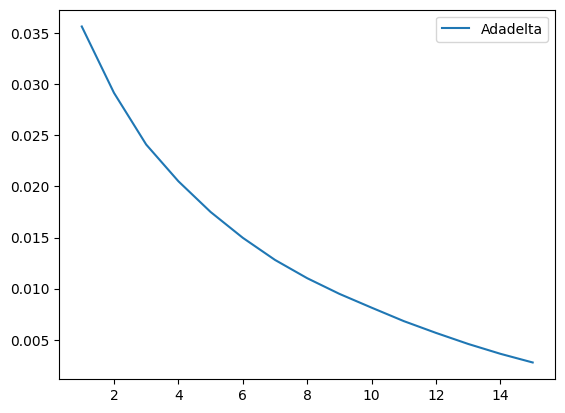

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from itertools import islice
import time
import matplotlib.pyplot as plt

batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=2)

class myVGG16(nn.Module):
    def __init__(self):
        super(myVGG16, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Полносвязанные слои
        self.classifier = nn.Sequential(
            nn.Linear(512 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

plt.clf()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net0 = myVGG16().to(device)
net = myVGG16().to(device)
criterion = nn.CrossEntropyLoss()

def resetNet():
    net.load_state_dict(net0.state_dict())

def countAccuracy():
    correct = 0
    size = len(trainloader)
    for image, label in islice(trainloader, size):
        image, label = image.to(device), label.to(device)
        output = net(image)
        _, predicted = torch.max(output.data, 1)
        correct += (predicted == label).sum().item()
    return 100 * correct / len(trainset)

def train():
    xs, ys = [], []
    batch_num = len(trainloader)
    for epoch in range(15):
        running_loss = 0.0
        for inputs, labels in islice(trainloader, batch_num):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        xs.append(epoch + 1)
        ys.append(running_loss / len(trainset))
        print(f'Эпоха: {xs[-1]}, Потери: {ys[-1]}')
    plt.plot(xs, ys, label = "Adadelta")

resetNet()
print(f"Точность без обучения: {countAccuracy():.2f}%")
print(f"Точность без обучения: {countAccuracy():.2f}%")

#optimizer = optim.SGD(net.parameters(), lr= 0.01)
optimizer = optim.Adadelta(net.parameters(), lr=0.1)
# optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, nesterov=True)
#optimizer = optim.Adam(net.parameters(), lr=0.001)


train()
print('Обучение завершено')
print(f"Точность после обучения: {countAccuracy():.2f}%")

plt.legend()
plt.show()

In [1]:
import torch
print(torch.cuda.is_available())

False


In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


0
Эпоха: 1, Потери: 0.0140179618014037
1
Эпоха: 2, Потери: 0.012051794045578565
2
Эпоха: 3, Потери: 0.010398323868599046
3
Эпоха: 4, Потери: 0.00895451720449073
4
Эпоха: 5, Потери: 0.00764146960748936
Точность после доп обучения: 79.85%


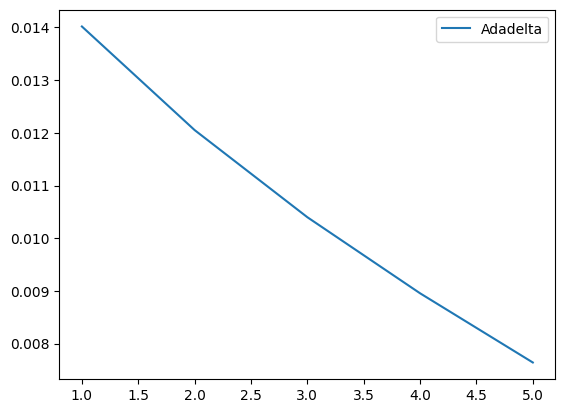

In [11]:
train()
print(f"Точность после доп обучения: {countAccuracy():.2f}%")

plt.legend()
plt.show()